# Q2.2 Dual PCA of Yale Face Database
## Importing Libraries

In [171]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

plt.rcParams['figure.figsize'] = [10,5]

## Importing Yale Face Dababase

In [172]:
data = scipy.io.loadmat('./YaleFaceDataBase/Yale_64x64.mat')

## In Dual PCA if A has dimensions n by t then n >> t

## Taking only t-number of samples for Analysis

In [173]:
t = 150
X = np.array(data['fea'])[:t,:].T

In [174]:
print(X.shape)

(4096, 150)


## Visualizing one of the sample image

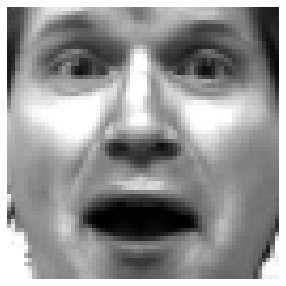

In [175]:
img = plt.imshow(X[:,1].reshape(64,64).transpose())
img.set_cmap('gray')
plt.axis('off')
plt.show()

## Calculating At*A

In [176]:
XtX = np.matmul(X.T,X)

In [177]:
print(XtX.shape)

(150, 150)


## Calculating Eigen values of At*A

In [178]:
eigValues, eigVectors = np.linalg.eigh(XtX)

In [179]:
print(eigValues.shape)

(150,)


In [180]:
print(eigValues)

[-1.82302342e+03 -1.68606140e+03 -1.65441780e+03 -1.63293878e+03
 -1.57578099e+03 -1.56229898e+03 -1.53224097e+03 -1.47163683e+03
 -1.43769037e+03 -1.41887016e+03 -1.37378240e+03 -1.34908955e+03
 -1.29958143e+03 -1.27968890e+03 -1.25987992e+03 -1.21417695e+03
 -1.19686906e+03 -1.17116650e+03 -1.16310651e+03 -1.13211758e+03
 -1.12393960e+03 -1.07992892e+03 -1.03484362e+03 -1.01663878e+03
 -9.97282065e+02 -9.68860140e+02 -9.62169567e+02 -9.42521715e+02
 -9.21701388e+02 -8.78525773e+02 -8.54421718e+02 -8.48455686e+02
 -8.04762347e+02 -7.86552413e+02 -7.62890535e+02 -7.50485307e+02
 -7.34717212e+02 -7.26098816e+02 -6.65282065e+02 -6.63291357e+02
 -6.50967128e+02 -6.35191269e+02 -6.00557438e+02 -5.84963218e+02
 -5.60261430e+02 -5.50801480e+02 -5.18180783e+02 -5.04358417e+02
 -4.71394029e+02 -4.53218158e+02 -4.29462096e+02 -4.18931885e+02
 -4.02349532e+02 -4.00320684e+02 -3.64889479e+02 -3.61761976e+02
 -3.44564320e+02 -3.19722868e+02 -2.82297166e+02 -2.59219953e+02
 -2.49983332e+02 -2.19474

## Sorting eigen values in descending values and changing order of 
## eigen vectors correspondingly

In [181]:
idx = eigValues.argsort()[::-1]   
eigValues = eigValues[idx]
eigVectors = eigVectors[:,idx]

In [182]:
print(eigValues)

[ 1.91684215e+04  1.89146458e+03  1.75432535e+03  1.66069995e+03
  1.60191089e+03  1.57032486e+03  1.52790154e+03  1.49994874e+03
  1.49171276e+03  1.46796878e+03  1.44619930e+03  1.37917957e+03
  1.36535820e+03  1.35413286e+03  1.30007327e+03  1.28389045e+03
  1.23259162e+03  1.22291412e+03  1.20104664e+03  1.15941893e+03
  1.14026109e+03  1.09406733e+03  1.07030912e+03  1.05308279e+03
  1.02911664e+03  9.91094580e+02  9.85688146e+02  9.75308318e+02
  9.62508398e+02  9.28832800e+02  9.00885433e+02  8.77472358e+02
  8.36721309e+02  8.29878177e+02  7.98033917e+02  7.83708713e+02
  7.61446789e+02  7.42235239e+02  7.15398419e+02  7.02858024e+02
  6.77779881e+02  6.63959788e+02  6.37666956e+02  5.91635344e+02
  5.67503402e+02  5.62753873e+02  5.39045745e+02  5.24170961e+02
  5.08651725e+02  4.88035671e+02  4.83137214e+02  4.56303628e+02
  4.42195304e+02  4.10746947e+02  3.96315507e+02  3.52547493e+02
  3.32794562e+02  3.25156049e+02  3.17273586e+02  2.97625493e+02
  2.76296525e+02  2.52284

In [183]:
eigVals = eigValues.copy()

## Finding out number of least significant eigen Values

In [184]:
r = 0
index_of_small_eig_values = []
while(r<len(eigValues)):
        if eigValues[r]>-1 and eigValues[r]<1:
            index_of_small_eig_values.append(eigValues[r])
        r += 1

## Here that number turns out to be 50

In [185]:
small_eig_vals = len(index_of_small_eig_values)
print(small_eig_vals)

2


In [186]:
eigVals = np.array(eigVals)

## Creating Singular value matrix

In [187]:
D = eigVals[:-small_eig_vals]**(1/2)

<ipython-input-187-d28a20d5e710>:1: RuntimeWarning: invalid value encountered in sqrt
  D = eigVals[:-small_eig_vals]**(1/2)


## Visualizing Singular values matrix pattern

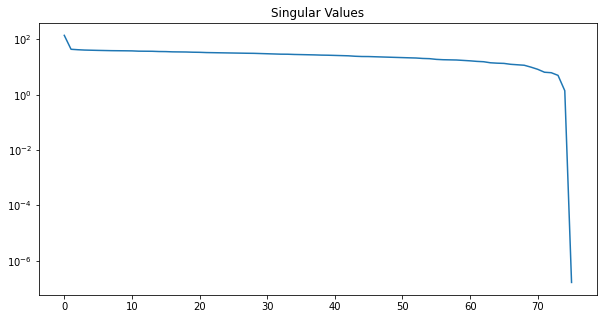

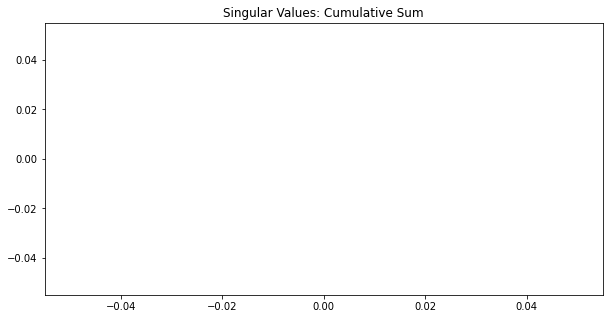

In [188]:
plt.figure(1)
plt.semilogy(D)
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(D)/np.sum(D))
plt.title('Singular Values: Cumulative Sum')
plt.show()

## Formint V.transpose() Matrix

In [189]:
Vt = eigVectors.copy().T

## Reconstruction of Training data
## xcap = X**V**Vt

In [190]:
Xcap = (X.dot(Vt.T)).dot(Vt)

In [191]:
print(Xcap.shape)

(4096, 150)


## Visualizing Reconstructed Data

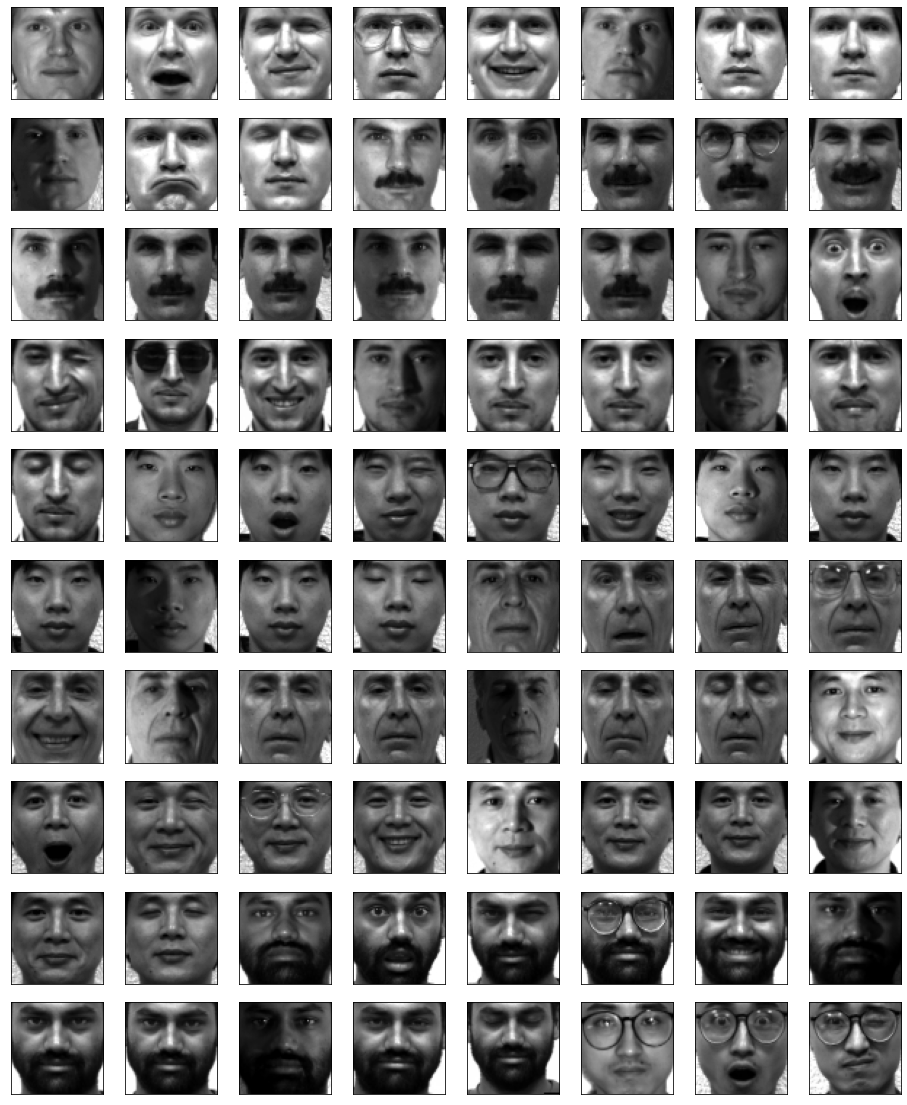

In [192]:
plt.figure(figsize=(16,20))
for i in range(1,81):
    plt.subplot(10,8,i,xticks=[],yticks=[])
    img = plt.imshow(Xcap[:,i-1].reshape(64,64).T.astype('uint8'),cmap='gray')
    plt.plot()

## Reconstruction of Test Data
### ycap = X**V**(Σ^−2)**Vt**Xtx

In [193]:
print(D)

[1.38450069e+02 4.34909713e+01 4.18846673e+01 4.07516865e+01
 4.00238790e+01 3.96273246e+01 3.90883811e+01 3.87291717e+01
 3.86226975e+01 3.83140807e+01 3.80289271e+01 3.71373070e+01
 3.69507537e+01 3.67985443e+01 3.60565288e+01 3.58314171e+01
 3.51082843e+01 3.49701891e+01 3.46561198e+01 3.40502413e+01
 3.37677523e+01 3.30766887e+01 3.27155791e+01 3.24512371e+01
 3.20798478e+01 3.14816547e+01 3.13956708e+01 3.12299266e+01
 3.10243195e+01 3.04767584e+01 3.00147536e+01 2.96221599e+01
 2.89261354e+01 2.88076062e+01 2.82494941e+01 2.79947980e+01
 2.75943253e+01 2.72439946e+01 2.67469329e+01 2.65114697e+01
 2.60342060e+01 2.57674172e+01 2.52520684e+01 2.43235553e+01
 2.38223299e+01 2.37224340e+01 2.32173587e+01 2.28947802e+01
 2.25533085e+01 2.20915294e+01 2.19803825e+01 2.13612647e+01
 2.10284404e+01 2.02668929e+01 1.99076746e+01 1.87762481e+01
 1.82426578e+01 1.80320839e+01 1.78121752e+01 1.72518258e+01
 1.66221697e+01 1.58834649e+01 1.54243650e+01 1.41475111e+01
 1.36843288e+01 1.342343

In [194]:
D_Store = D.copy()

In [196]:
D = D_Store.copy()

In [197]:
nan_entries = np.isnan(D)
not_nan = ~nan_entries
D = D[not_nan]

In [198]:
D_temp = np.zeros((len(D),len(D)))
for i in range(len(D)):
    D_temp[i][i] = D[i]
D = D_temp

In [199]:
for i in range(len(D)):
    print(D[i][i])

138.45006877779886
43.49097129476265
41.8846672511279
40.751686465494416
40.02387898672302
39.627324638874114
39.08838109597139
38.72917171685998
38.62269745985533
38.31408071176818
38.02892708555228
37.137306996867366
36.95075374578368
36.79854426433575
36.056528806823415
35.83141710725171
35.10828426108996
34.97018906197569
34.656119830380895
34.050241267884246
33.767752251198004
33.07668868417812
32.71557910105695
32.45123706235369
32.07984783960393
31.48165465314089
31.3956708181948
31.229926639553288
31.024319466681707
30.476758365438943
30.01475359504595
29.62215991866614
28.92613540085708
28.8076062285888
28.249494098143515
27.994797961815653
27.594325309257787
27.24399455206002
26.746932898832892
26.51146967456002
26.034205983380737
25.767417171009683
25.25206835489695
24.323555332113887
23.822329909369127
23.7224339698779
23.21735870108173
22.894780217695054
22.55330850765035
22.09152940323145
21.980382491645834
21.361264656895482
21.02844036529927
20.26689286907764
19.9076745

In [200]:
invD_sq = np.linalg.inv(np.matmul(D,D))

In [201]:
print(invD_sq)

[[5.21691365e-05 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.28690840e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.70019694e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.05987789e-02
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  5.21545670e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 3.74909533e+13]]


In [166]:
print(X.shape)
print(Vt.T.shape)
print(invD_sq.shape)
print(Vt.shape)
print(X.T.shape)
print(X.shape)

(4096, 150)
(150, 150)
(76, 76)
(150, 150)
(150, 4096)
(4096, 150)


In [167]:
X_approx = X[:,:t]
Vt_approx = Vt[:t,:t]

TypeError: unsupported operand type(s) for -: 'str' and 'int'

In [49]:
print(X_approx.shape)
print(Vt_approx.T.shape)
print(invD_sq.shape)
print(Vt_approx.shape)
print(X_approx.T.shape)
print(X_approx.shape)

(4096, 148)
(148, 148)
(148, 148)
(148, 148)
(148, 4096)
(4096, 148)


In [50]:
UUt = np.matmul(X_approx[:,:],np.matmul(Vt_approx.T,np.matmul(invD_sq,np.matmul(Vt_approx,X_approx.T))))

In [51]:
y = np.matmul(UUt,X[:,0])

In [52]:
print(y.shape)

(4096,)


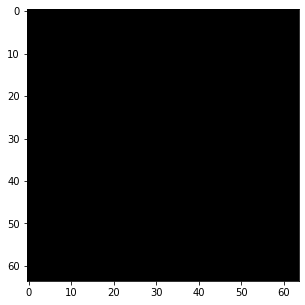

In [53]:
img = plt.imshow(y.reshape(64,64).astype('uint8').T)
img.set_cmap('gray')

## In Dual PCA, in most cases reconstruction of test data 
## i.e. out of sample reconstruction is not possible